# Random Forest

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib19']

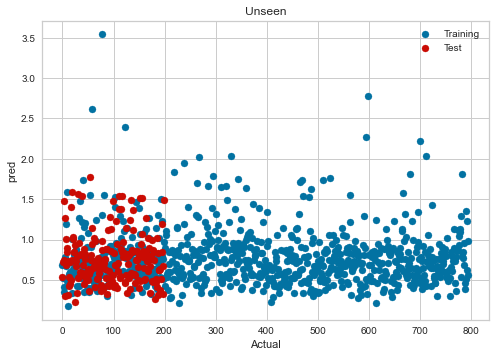

In [9]:

Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib19']
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

In [12]:
# n_estimators = [160,180]
# max_features = ['auto','sqrt']
# max_depth = [19,20]
# min_samples_split = [3,4]
# min_samples_leaf = [3,4]
# criterion=['mse','mae']
n_estimators = [150,160,175,200]
# max_features = ['auto','sqrt']
max_depth = [8,9,10]
min_samples_split = [4,5,6]
min_samples_leaf = [2,3,4]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap
              }

In [13]:
# Use the random grid to search for best hyperparameters
yt=np.log(y)
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 108 is smaller than n_iter=150. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [150, 160, 175, 200]},
                   random_state=42, verbose=2)

In [14]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=175)

In [68]:
modo=RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=175)
mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

In [69]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [70]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib19']
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

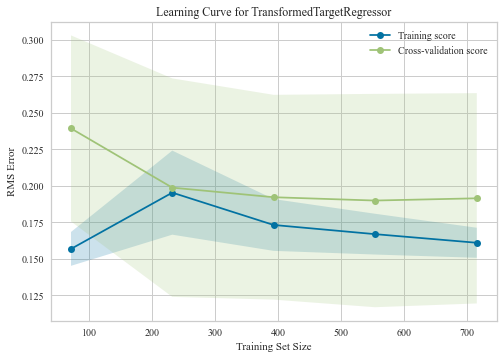

In [71]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [72]:
X = X.to_numpy()
y = y.to_numpy()


In [73]:
y_Test=y_Test.to_numpy()

In [74]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.402078

Root Mean squared error: 0.156554

Root Mean squared error: 0.157246

Root Mean squared error: 0.160507

Root Mean squared error: 0.195633

Root Mean squared error: 0.162764

Root Mean squared error: 0.151286

Root Mean squared error: 0.205567

Root Mean squared error: 0.176914

Root Mean squared error: 0.150746

error COV--->0    0.953329
dtype: float64  error mean --->0    0.111086
Name: mean, dtype: float64  error std --->0    0.105901
Name: std, dtype: float64


# train score

In [75]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.427391
dtype: float64  error mean --->0    0.093977
Name: mean, dtype: float64  error std --->0    0.134142
Name: std, dtype: float64


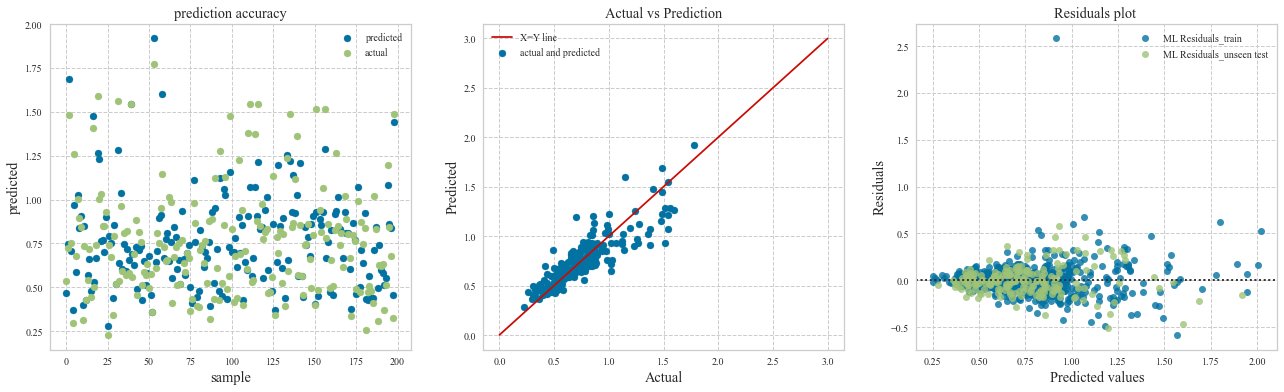

In [106]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Gradient

In [107]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

In [108]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib19']

In [109]:
random_grid = {"learning_rate"   : [0.05,0.06,0.065],
             "subsample"        : [0.1,0.2,0.3],
             "n_estimators": [200,250,300],
             'max_depth'        : [2,3,4],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.1,0.15,0.2],
             "min_samples_leaf" : [0.05,0.055,0.06]
             }

In [110]:
yt=np.log(y)
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.06, 0.065],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.05, 0.055, 0.06],
                                        'min_samples_split': [0.1, 0.15, 0.2],
                                        'n_estimators': [200, 250, 300],
                                        'subsample': [0.1, 0.2, 0.3]},
                   random_state=42, verbose=2)

In [111]:
rf_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.06, max_depth=2, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=0.3)

In [112]:
modo=GradientBoostingRegressor(learning_rate=0.06, max_depth=2, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=0.3)
mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

In [113]:
cv = KFold(n_splits=10, random_state=1)

In [114]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

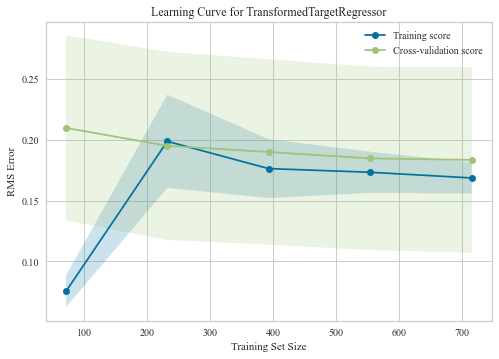

In [115]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [116]:
X = X.to_numpy()
y = y.to_numpy()

In [117]:
y_Test=y_Test.to_numpy()

In [118]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.393078

Root Mean squared error: 0.166905

Root Mean squared error: 0.137437

Root Mean squared error: 0.156112

Root Mean squared error: 0.144696

Root Mean squared error: 0.159654

Root Mean squared error: 0.145732

Root Mean squared error: 0.223020

Root Mean squared error: 0.181667

Root Mean squared error: 0.126994

error COV--->0    0.972929
dtype: float64  error mean --->0    0.094006
Name: mean, dtype: float64  error std --->0    0.091461
Name: std, dtype: float64


# train score

In [119]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.66008
dtype: float64  error mean --->0    0.089298
Name: mean, dtype: float64  error std --->0    0.148241
Name: std, dtype: float64


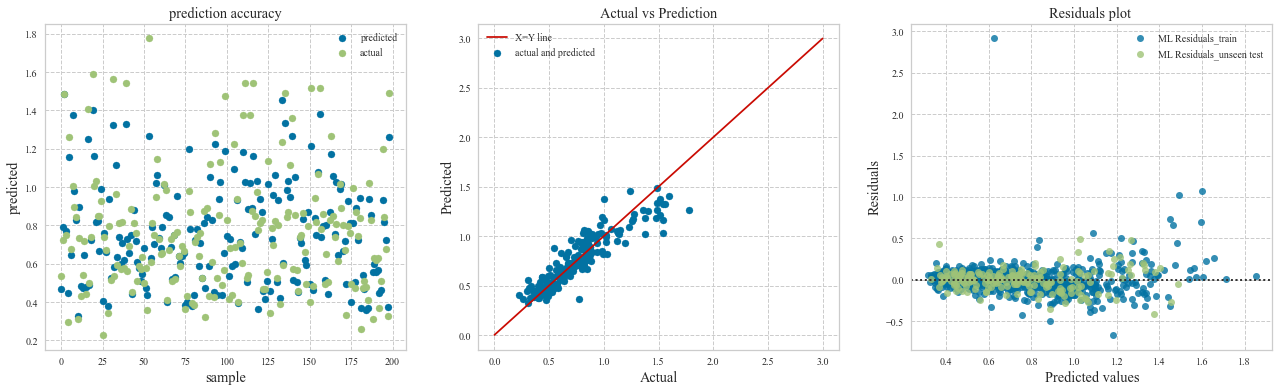

In [120]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()